### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 5/data/coupons.csv')

In [4]:
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#looking at the names of the columns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
#see ing the various data types of ech column
data.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


In [7]:
#total rows, columns before dropping anything
print(data.shape)

(12684, 26)


In [8]:
#looking at the missig data summary
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [9]:
# check for dupicates
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 74


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#renaming some columns to my desired names
data.rename(columns={'Bar': 'Amount of Times to Bars',
                      'RestaurantLessThan20': 'Times to Restaurants <20$',
                      'CoffeeHouse': 'Amount of Times to Cafes',
                     'CarryAway' : 'Amt of Times of Carryout',
                     'Restaurant20To50': 'Times to Restaurants 20$<50$'                     },
            inplace=True)

In [11]:
#dropping car column because too many nulls in that columns
data = data.drop(columns=['car'])

In [12]:
#checking if the column is dropped
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [13]:
# Remove duplicates
data = data.drop_duplicates()

In [14]:
# List of columns to fill
columns_to_fill = [
    'Amount of Times to Bars',
    'Amount of Times to Cafes',
    'Amt of Times of Carryout',
    'Times to Restaurants <20$',
    'Times to Restaurants 20$<50$'
]

# Check if the columns exist in the dataframe
existing_columns = [col for col in columns_to_fill if col in data.columns]

# Fill NaN values with 0 only for the existing columns
data[existing_columns] = data[existing_columns].fillna(0)


<ipython-input-14-32a8f81fdd06>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[existing_columns] = data[existing_columns].fillna(0)


In [15]:
#check how much data has changed after cleanign data
print(data.shape)

(12610, 25)


4. What proportion of the total observations chose to accept the coupon?



In [16]:
prop_accept = (data['Y'] == 1).sum() / len(data) *100

prop_not_accept = (data['Y'] == 0).sum() / len(data)

print("Proportion of total observations that chose to accept the coupon:", prop_accept,"%")


Proportion of total observations that chose to accept the coupon: 56.75654242664552 %


5. Use a bar plot to visualize the `coupon` column.

In [17]:
# seeing the types of coupons to prepare for plotting
data.value_counts('coupon')

,count
coupon,
Coffee House,3989
Restaurant(<20),2779
Carry out & Take away,2344
Bar,2010
Restaurant(20-50),1488


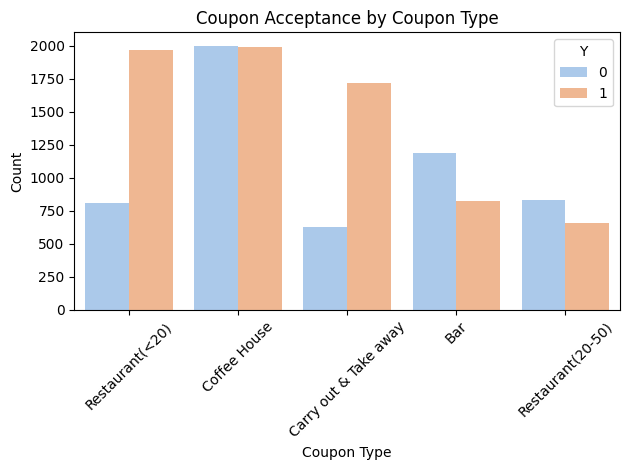

In [56]:
sns.countplot(data, x='coupon',hue ='Y', palette='pastel')
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coupon_acceptance_by_type.png', bbox_inches='tight', dpi=300)
plt.show()


In [19]:
acceptance_rate_by_coupon = data.groupby('coupon')['Y'].mean() * 100

# Display the result
print("Acceptance Rate by Coupon Type (%):")
print(acceptance_rate_by_coupon.sort_values(ascending=False))

Acceptance Rate by Coupon Type (%):
coupon
Carry out & Take away    73.378840
Restaurant(<20)          70.780856
Coffee House             49.862121
Restaurant(20-50)        44.153226
Bar                      40.995025
Name: Y, dtype: float64


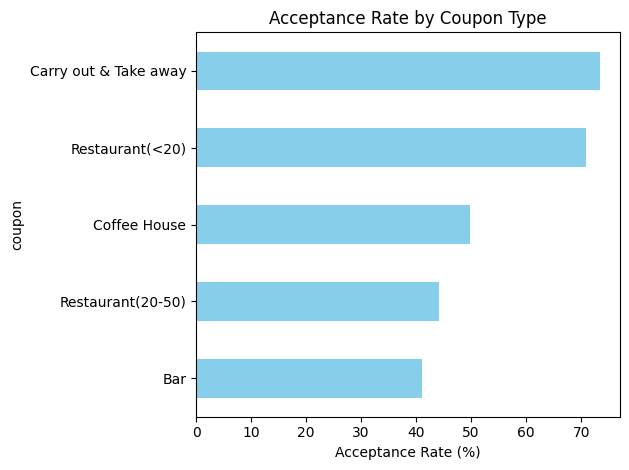

In [72]:
import matplotlib.pyplot as plt
acceptance_rate_by_coupon.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Coupon Type')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coupon_acceptance_rate_by_type.png')
plt.show()

6. Use a histogram to visualize the temperature column.

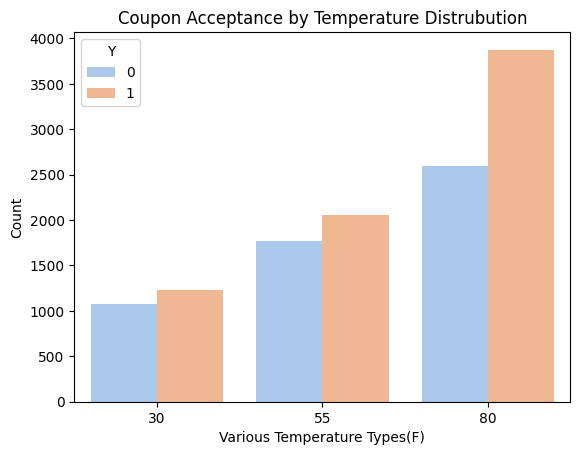

In [58]:

sns.countplot(data, x='temperature', hue='Y', palette='pastel')
plt.title('Coupon Acceptance by Temperature Distrubution')
plt.xlabel('Various Temperature Types(F)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coupon_acceptance_by_temp.png')
plt.show()


In [22]:
data['temperature'].value_counts()

,count
temperature,
80,6475
55,3830
30,2305


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
bar_coupons = data[data['coupon']== 'Bar']
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Amount of Times to Cafes,Amt of Times of Carryout,Times to Restaurants <20$,Times to Restaurants 20$<50$,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [24]:

prop_bar_accept = (bar_coupons['Y'] == 1).sum() / len(bar_coupons)*100
print("Accepted bar coupons were", prop_bar_accept, "%")


Accepted bar coupons were 40.99502487562189 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
bar_three_or_less = bar_coupons.loc[
    (bar_coupons['Amount of Times to Bars'] == 'never') |
    (bar_coupons['Amount of Times to Bars'] == 'less1') |
    (bar_coupons['Amount of Times to Bars'] == '1~3') |
    (bar_coupons['Amount of Times to Bars'] == '0')]
bar_more_than_three = bar_coupons.loc[
    (bar_coupons['Amount of Times to Bars']== '4~8') |
    (bar_coupons['Amount of Times to Bars']== 'gt8')]

bar_three_or_less_rate= bar_three_or_less['Y'].mean()*100
bar_more_than_three_rate = bar_more_than_three['Y'].mean()*100

print("Acceptance rate for those who went more than three times:", bar_more_than_three_rate, "%")
print("Acceptance rate for those who went less than three times:", bar_three_or_less_rate,"%")


Acceptance rate for those who went more than three times: 76.88442211055276 %
Acceptance rate for those who went less than three times: 37.0391061452514 %


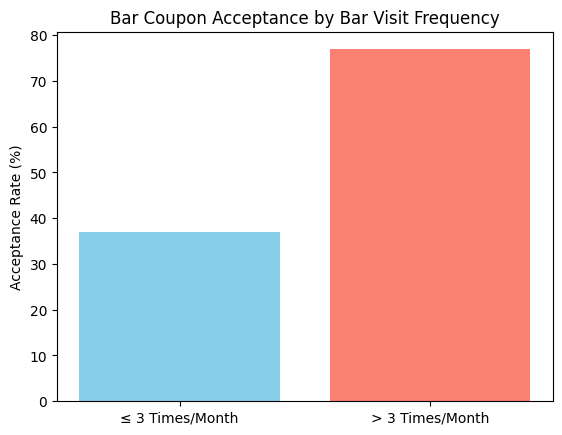

In [59]:

# Basic bar plot
plt.bar(['≤ 3 Times/Month', '> 3 Times/Month'],
        [bar_three_or_less_rate, bar_more_than_three_rate],
        color=['skyblue', 'salmon'])

plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance by Bar Visit Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/bar_coupon_acceptance_by_freq.png')
plt.show()

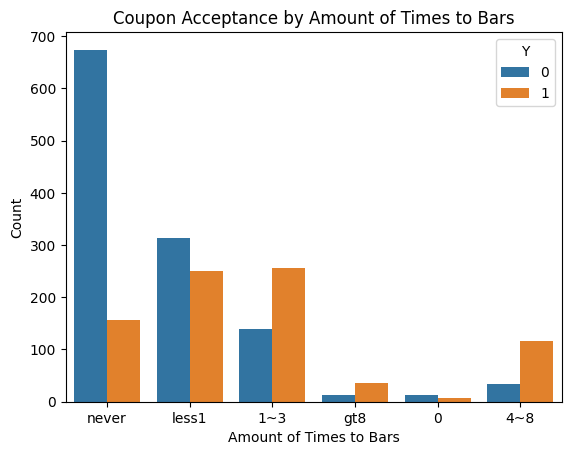

In [60]:
#visialize the data
sns.countplot(bar_coupons, x='Amount of Times to Bars', hue='Y')
plt.title('Coupon Acceptance by Amount of Times to Bars')
plt.xlabel('Amount of Times to Bars')
plt.ylabel('Count')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coupon_acceptance_by_bar_amt.png')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
# Make a copy and safely convert 'age' to numeric
bar_coupons = bar_coupons.copy()
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# frequent bar-goers over 25
bar_more_than_once_and_over_25 = bar_coupons.query(
    "`Amount of Times to Bars` in ['1~3', '4~8', 'gt8'] and age > 25"
)

# everyone else (drop group A)
everyone_else = bar_coupons.drop(bar_more_than_once_and_over_25.index)

# Calculate coupon acceptance rates
bar_more_than_once_and_over_25_rate = bar_more_than_once_and_over_25['Y'].mean() * 100
everyone_else_rate = everyone_else['Y'].mean() * 100

# Print results
print("Acceptance Rate for frequent bar-goers > 25 yrs)", bar_more_than_once_and_over_25_rate, "%")
print("Acceptance Rate for all others", everyone_else_rate, "%")


Acceptance Rate for frequent bar-goers > 25 yrs) 69.97167138810198 %
Acceptance Rate for all others 34.8219674109837 %


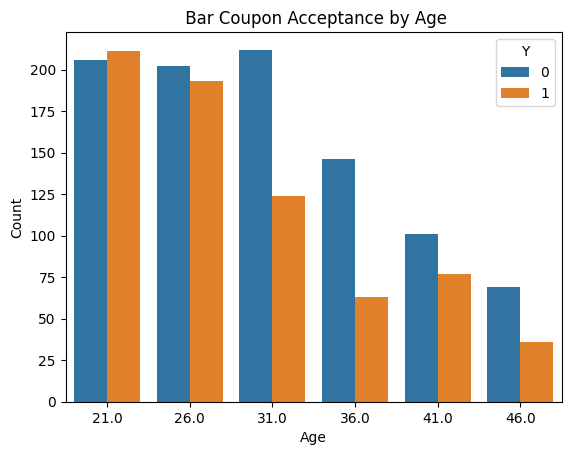

In [85]:
sns.countplot(bar_coupons, x='age', hue='Y')
plt.title(' Bar Coupon Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/bar_coupon_acceptance_by_age.png')
plt.show()


In [104]:
# Calculate the acceptance rate by age in bar_coupons
acceptance_by_age = bar_coupons.groupby('age')['Y'].mean() * 100

# Print the acceptance rates by age in bar coupon df
print("Acceptance Rate by Age (in %):")
print(acceptance_by_age)


Acceptance Rate by Age (in %):
age
21.0    50.599520
26.0    48.860759
31.0    36.904762
36.0    30.143541
41.0    43.258427
46.0    34.285714
Name: Y, dtype: float64


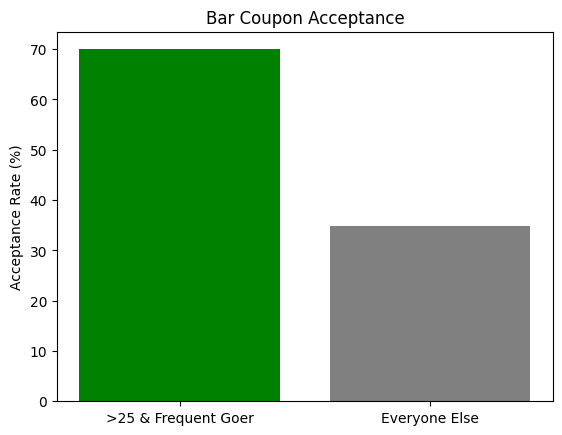

In [62]:
#visialize the data
plt.bar(
    ['>25 & Frequent Goer', 'Everyone Else'],
    [bar_more_than_once_and_over_25_rate, everyone_else_rate],
    color=['green', 'gray']
)

plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/bar_coupon_acceptance_rate_bar-goer_25.png')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [31]:

# Group that matches the folowing conditions: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
group_a = bar_coupons.query(
    "`Amount of Times to Bars` in ['1~3', '4~8', 'gt8'] and \
     passanger != 'Kid(s)' and \
     occupation != 'Farming Fishing & Forestry'"
)

# Everyone else who does not meet all 3 criteria
everyone_execept_group_a = bar_coupons.drop(group_a.index)

group_a_acceptance = group_a['Y'].mean() *100
everyone_execept_group_a_acceptance = everyone_execept_group_a['Y'].mean()*100

# Print results
print("Group A Acceptance Rate (bar-goers w/ no kids & non-farmers):", group_a_acceptance, "%")
print("Group B Acceptance Rate (all others):", everyone_execept_group_a_acceptance, "%")



Group A Acceptance Rate (bar-goers w/ no kids & non-farmers): 71.32486388384754 %
Group B Acceptance Rate (all others): 29.5407813570939 %


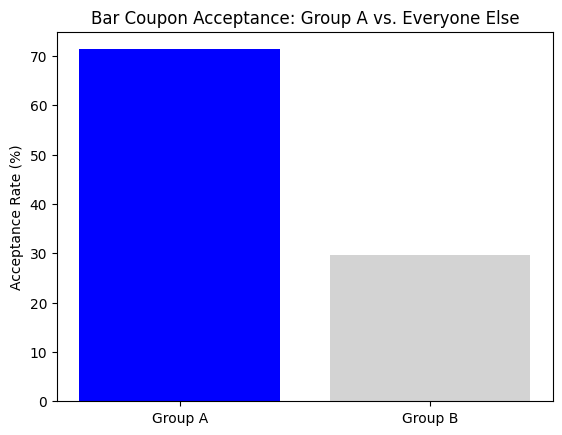

In [73]:
#visualize the groups
plt.bar(['Group A', 'Group B'],
        [group_a_acceptance, everyone_execept_group_a_acceptance],
        color=['blue', 'lightgray'])

plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance: Group A vs. Everyone Else')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/bar_coupon_acceptance_rate_group_a_vs_everyone_else.png')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [33]:
bar_coupons['income_clean'] = bar_coupons['income'].str.replace('[\$,]', '', regex=True).str.extract('(\d+)', expand=False).astype(float)

bar_more_than_once_and_not_a_kid_and_not_widowed = bar_coupons.query(
    "`Amount of Times to Bars` in ['1~3', '4~8', 'gt8'] and \
     passanger != 'Kid(s)' and \
     maritalStatus != 'Widowed'"
)
bar_more_than_once_and_under_30 = bar_coupons.query(
    "`Amount of Times to Bars` in ['1~3', '4~8', 'gt8'] and \
     age < 30"
)
cheap_restaurants = bar_coupons.query(
    "`Times to Restaurants <20$` in [ '4~8', 'gt8'] and \
     income_clean <50000 "
)

bar_more_than_once_and_not_a_kid_and_not_widowed_rate = bar_more_than_once_and_not_a_kid_and_not_widowed['Y'].mean()*100
bar_more_than_once_and_under_30_rate = bar_more_than_once_and_under_30['Y'].mean()*100
cheap_restaurants_rate = cheap_restaurants['Y'].mean()*100


print("Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:", bar_more_than_once_and_not_a_kid_and_not_widowed_rate, "%")
print("Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30:", bar_more_than_once_and_under_30_rate, "%")
print("Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:", cheap_restaurants_rate, "%")


Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.32486388384754 %
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: 73.13432835820896 %
Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.348837209302324 %


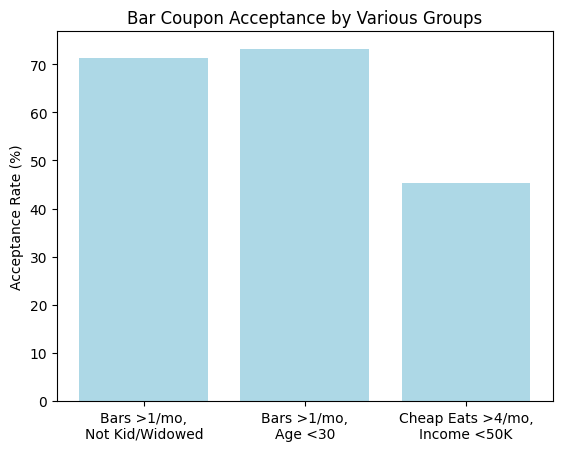

In [64]:
#visialize the data
labels = ['Bars >1/mo,\nNot Kid/Widowed', 'Bars >1/mo,\nAge <30', 'Cheap Eats >4/mo,\nIncome <50K']
rates = [
    bar_more_than_once_and_not_a_kid_and_not_widowed_rate,
    bar_more_than_once_and_under_30_rate,
    cheap_restaurants_rate
]

plt.bar(labels, rates, color='lightblue')
plt.ylabel('Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance by Various Groups')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/bar_coupon_acceptance_rate_group.png')
plt.show()

In [106]:
# Acceptance rate by travel companion
acceptance_by_companion_bar = bar_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False) * 100
print("Acceptance Rate by Travel Companion (in %):")
print(acceptance_by_companion_bar)

Acceptance Rate by Travel Companion (in %):
passanger
Friend(s)    55.820896
Alone        40.734558
Partner      38.827839
Kid(s)       21.078431
Name: Y, dtype: float64


<ipython-input-110-386113d31ce9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_companion_bar.index, y=acceptance_by_companion_bar.values, palette = 'pastel')


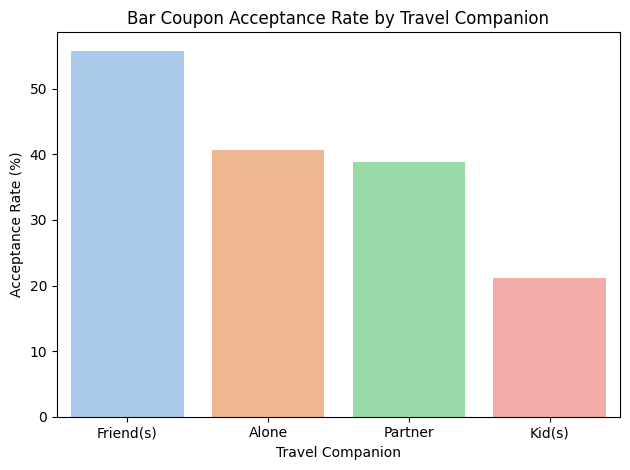

In [110]:
sns.barplot(x=acceptance_by_companion_bar.index, y=acceptance_by_companion_bar.values, palette = 'pastel')
plt.title("Bar Coupon Acceptance Rate by Travel Companion")
plt.xlabel("Travel Companion")
plt.ylabel("Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/bar_coupon_acceptance_by_companion.png')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [35]:
print("Drivers that freqently go to bars are more likely to accept bar coupons")
print("Under 30yrs of age frequent bar-goers are more likely to accept bar coupons")
print("Drivers with adult passengers rather than kid passengers are more likely to accept bar coupons, possibly due to social or practical constraints with children.")
print("21-year-old drivers show the highest acceptance count for bar coupons.")

Drivers that freqently go to bars are more likely to accept bar coupons
Under 30yrs of age frequent bar-goers are more likely to accept bar coupons
Drivers with adult passengers rather than kid passengers are more likely to accept bar coupons, possibly due to social or practical constraints with children.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [36]:
coffee_coupons = data.query('coupon == "Coffee House"')
coffee_coupons


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Amount of Times to Cafes,Amt of Times of Carryout,Times to Restaurants <20$,Times to Restaurants 20$<50$,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


Is there a time preference for accepting coffee house coupons?


In [37]:
#different types of time in the coffee coupons
coffee_coupons['time'].value_counts()

morning_time = coffee_coupons.query('time == "10AM" or time == "7AM"')
afternoon_time = coffee_coupons.query('time == "2PM"')
evening_time = coffee_coupons.query('time == "6PM" or time == "10PM"')

morning_time_rate = morning_time['Y'].mean()*100
afternoon_time_rate = afternoon_time['Y'].mean()*100
evening_time_rate = evening_time['Y'].mean()*100

print("Acceptance Rate for morning time:", morning_time_rate, "%")
print("Acceptance Rate for afternoon time:", afternoon_time_rate, "%")
print("Acceptance Rate for evening time:", evening_time_rate, "%")

Acceptance Rate for morning time: 54.224185532854776 %
Acceptance Rate for afternoon time: 54.728877679697355 %
Acceptance Rate for evening time: 41.371841155234655 %


<ipython-input-65-eb7f00644730>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_periods, y=rates, palette="pastel")


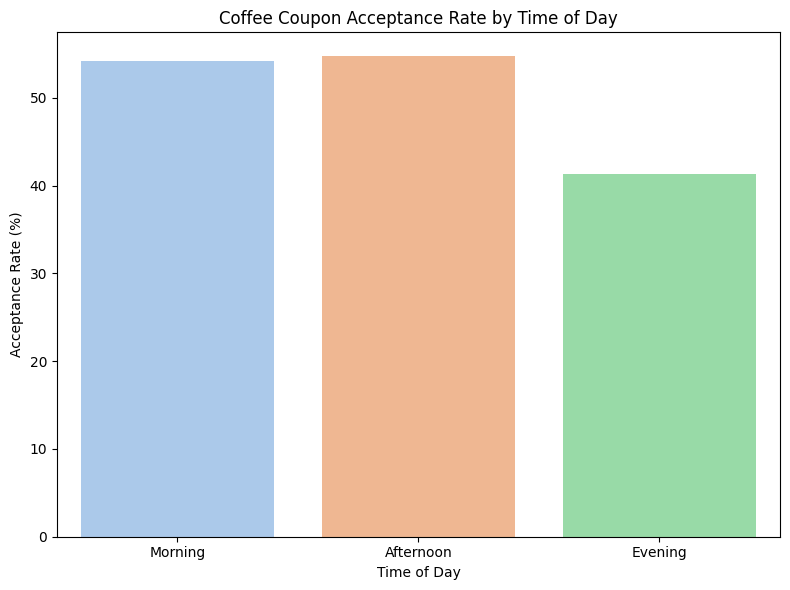

In [65]:
#visialize the data
time_periods = ['Morning', 'Afternoon', 'Evening']
rates = [morning_time_rate, afternoon_time_rate, evening_time_rate]

plt.figure(figsize=(8,6))
sns.barplot(x=time_periods, y=rates, palette="pastel")
plt.title("Coffee Coupon Acceptance Rate by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coffee_coupon_acceptance_by_time.png')
plt.show()

In [39]:
print("Drivers are more likely to accept Coffee House coupons in the afternoon (54.8%) and morning (54.2%) compared to the evening (41.5%). This pattern suggests that coffee outings are more common earlier in the day, likely aligning with typical energy needs during work or study hours. The sharp decline in the evening might indicate a reduced desire for caffeine or a shift toward other types of food and drink preferences later in the day.")

Drivers are more likely to accept Coffee House coupons in the afternoon (54.8%) and morning (54.2%) compared to the evening (41.5%). This pattern suggests that coffee outings are more common earlier in the day, likely aligning with typical energy needs during work or study hours. The sharp decline in the evening might indicate a reduced desire for caffeine or a shift toward other types of food and drink preferences later in the day.


What age is more likely to accept coupons for the Coffee House?

In [40]:
# Calculate the acceptance rate by gender
acceptance_by_age = coffee_coupons.groupby('age')['Y'].mean() * 100

# Print the acceptance rates by gender
print("Acceptance Rate by Age (in %):")
print(acceptance_by_age)


Acceptance Rate by Age (in %):
age
21         52.434881
26         51.482800
31         47.419355
36         46.766169
41         50.153846
46         50.925926
50plus     42.018349
below21    69.677419
Name: Y, dtype: float64


In [41]:
under21 = ['below21']
between_21_and50 = ['21','26','31','36','41','46']
over50 = ['50plus']

In [42]:
acceptance_rate_under21 = coffee_coupons.query('age in @under21')['Y'].mean() * 100
acceptance_rate_between_21_and50 = coffee_coupons.query('age in @between_21_and50')['Y'].mean() * 100
acceptance_rate_over50 = coffee_coupons.query('age in @over50')['Y'].mean() * 100

print("Acceptance Rate for age <21", acceptance_rate_under21, "%")
print("Acceptance Rate for age between 21 and 50 is ", acceptance_rate_between_21_and50, "%")
print("Acceptance Rate for age >50", acceptance_rate_over50, "%")


Acceptance Rate for age <21 69.6774193548387 %
Acceptance Rate for age between 21 and 50 is  50.22803283672849 %
Acceptance Rate for age >50 42.018348623853214 %


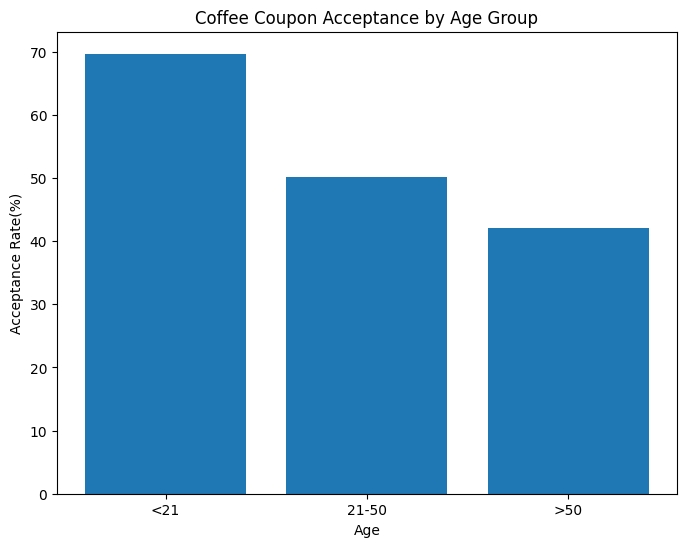

In [66]:
# graphing the acceptance rate of the age groups
age_groups = ['<21', '21-50', '>50']
rates = [acceptance_rate_under21, acceptance_rate_between_21_and50, acceptance_rate_over50]

plt.figure(figsize=(8,6))
plt.bar(age_groups,rates)
plt.title('Coffee Coupon Acceptance by Age Group')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate(%)')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coffee_coupon_acceptance_by_age_group.png')
plt.show()

<ipython-input-67-225bce60908e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_age.index, y=acceptance_by_age.values, palette = 'pastel')


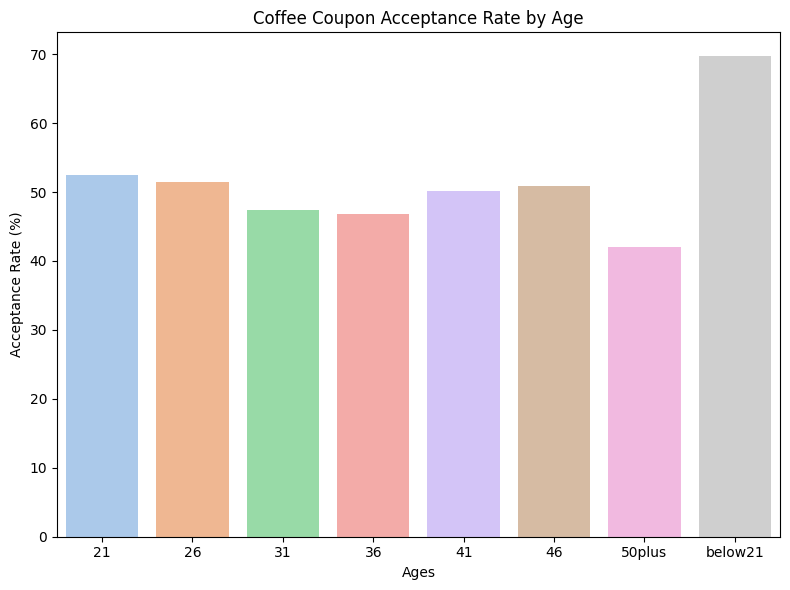

In [67]:
#visualize the acceptance rate by ages seperated
plt.figure(figsize=(8,6))
sns.barplot(x=acceptance_by_age.index, y=acceptance_by_age.values, palette = 'pastel')
plt.title("Coffee Coupon Acceptance Rate by Age")
plt.xlabel("Ages")
plt.ylabel("Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coffee_coupon_acceptance_by_age.png')
plt.show()

In [45]:
print("Below 21 had the highest accpetance rate of the coffee coupon at 69.7%, while 50+ had the lowest acceptance rate at 42%.")

Below 21 had the highest accpetance rate of the coffee coupon at 69.7%, while 50+ had the lowest acceptance rate at 42%.


What proportion of the total observations chose to accept the cofee coupon?

In [46]:
prop_accept_coffee = (coffee_coupons['Y'] == 1).sum() / len(coffee_coupons) *100

prop_not_accept_coffee = (coffee_coupons['Y'] == 0).sum() / len(coffee_coupons) *100

print("Proportion of total observations that chose to accept the coffee coupon:", prop_accept_coffee, "%")
print("Proportion of total observations that chose not to accept the coffee coupon:", prop_not_accept_coffee, "%")

Proportion of total observations that chose to accept the coffee coupon: 49.862120832288795 %
Proportion of total observations that chose not to accept the coffee coupon: 50.137879167711205 %


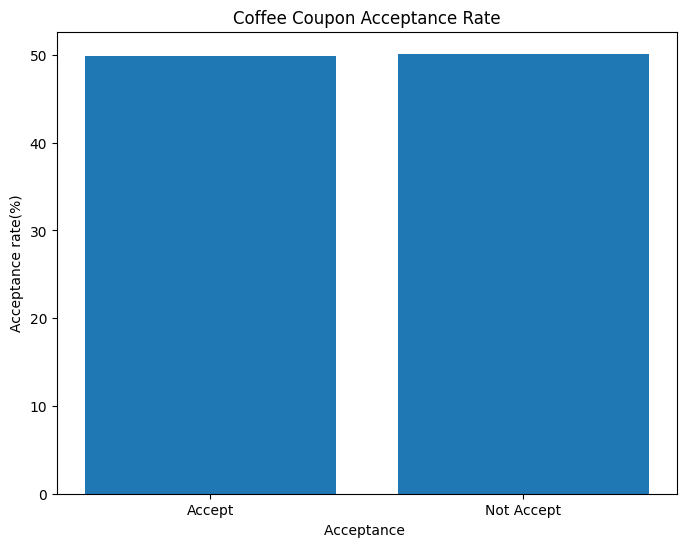

In [81]:
#graph the proportion rate of coffee acceptance rate
prop_rates= [prop_accept_coffee, prop_not_accept_coffee]
labels = ['Accept', 'Not Accept']

plt.figure(figsize=(8,6))
plt.bar(labels, prop_rates)
plt.title('Coffee Coupon Acceptance Rate')
plt.xlabel('Acceptance ')
plt.ylabel('Acceptance rate(%)')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coffee_coupon_acceptance_rate.png')
plt.show()

What is the acceptance rate by travel companion?

In [48]:
# Acceptance rate by travel companion
acceptance_by_companion = coffee_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False) * 100
print("Acceptance Rate by Travel Companion (in %):")
print(acceptance_by_companion)

Acceptance Rate by Travel Companion (in %):
passanger
Friend(s)    59.624796
Partner      56.907895
Kid(s)       48.058252
Alone        43.763870
Name: Y, dtype: float64


In [74]:
# another way to find the acceptance rate
coffee_coupons.groupby("passanger", as_index = False)["Y"].agg(['count', 'sum','mean']).round(2).sort_values(by='mean', ascending=True)

,passanger,count,sum,mean
0,Alone,2253,986,0.44
2,Kid(s),206,99,0.48
3,Partner,304,173,0.57
1,Friend(s),1226,731,0.60


<ipython-input-69-87bc2ff1dfc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_companion.index, y=acceptance_by_companion.values, palette = 'pastel')


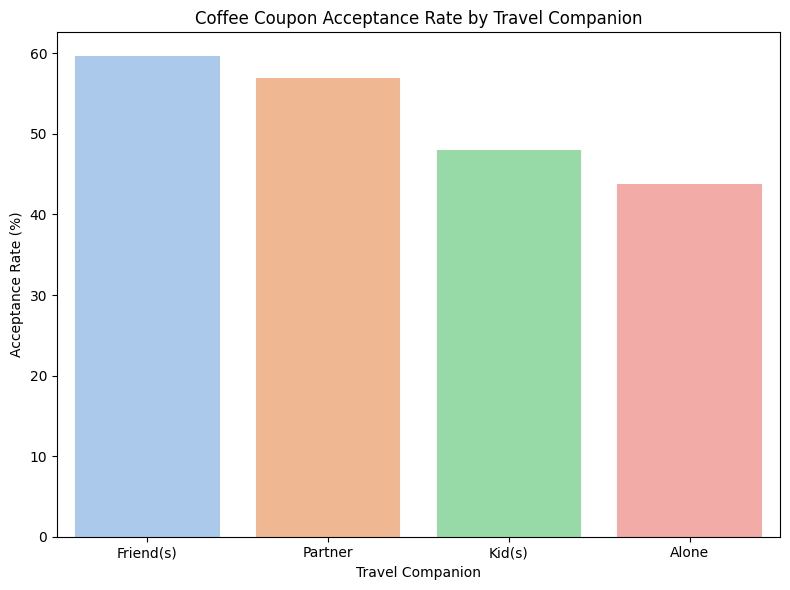

In [69]:
#visualize the acceptance rate by travel companion
plt.figure(figsize=(8,6))
sns.barplot(x=acceptance_by_companion.index, y=acceptance_by_companion.values, palette = 'pastel')
plt.title("Coffee Coupon Acceptance Rate by Travel Companion")
plt.xlabel("Travel Companion")
plt.ylabel("Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coffee_coupon_acceptance_by_companion.png')
plt.show()

In [50]:
print("From this figure, it is hypothesized that drivers are most likely to accept the coffee coupon while traveling with a friend( 59.6%) or partner(56.9%). It is less likely that the driver will accept the coffee coupon while trvaling alone(43.76%).")

From this figure, it is hypothesized that drivers are most likely to accept the coffee coupon while traveling with a friend( 59.6%) or partner(56.9%). It is less likely that the driver will accept the coffee coupon while trvaling alone(43.76%).


What is the acceptance rate by gender?

In [51]:
# Calculate the acceptance rate by gender
acceptance_by_gender = coffee_coupons.groupby('gender')['Y'].mean() * 100

# Print the acceptance rates by gender
print("Acceptance Rate by Gender (in %):")
print(acceptance_by_gender)

Acceptance Rate by Gender (in %):
gender
Female    49.169922
Male      50.592478
Name: Y, dtype: float64


<ipython-input-70-99557b26d9e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_gender.index, y=acceptance_by_gender.values, palette = 'pastel')


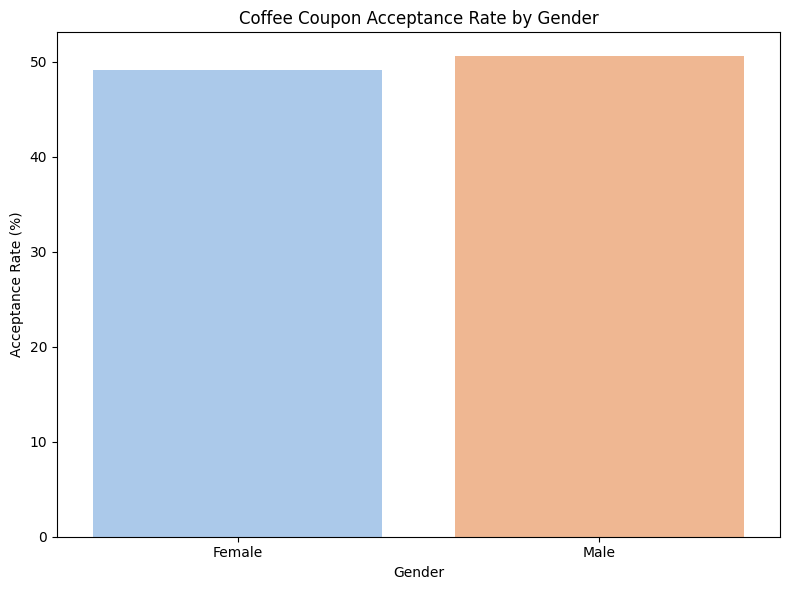

In [70]:
#visualize the acceptance rate by trvael companion
plt.figure(figsize=(8,6))
sns.barplot(x=acceptance_by_gender.index, y=acceptance_by_gender.values, palette = 'pastel')
plt.title("Coffee Coupon Acceptance Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 5/images/coffee_coupon_acceptance_by_gender.png')
plt.show()

In [53]:
print(" There is not much difference rate for coffee coupon acceptance per gender, with females at 49% and males at 51%.")

 There is not much difference rate for coffee coupon acceptance per gender, with females at 49% and males at 51%.
